In [68]:
import pandas as pd

We need to handle different country names from F1 dataset and UN dataset, we only have the below countries in map to handle, other countries work fine

In [69]:
country_map = {
    'UK':	'United Kingdom of Great Britain and Northern Ireland',
    'China':	'China, People\'s Republic of',
    'USA'	:'United States',
    'UAE'	:'United Arab Emirates',
    'Korea'	:'Democratic People\'s Republic of Korea',
    'Russia'	:'Russian Federation',
    'Vietnam':'Viet Nam'
}

def country_by_key(k):
  return country_map[k]

def country_by_value(v):
  return list(country_map.keys())[list(country_map.values()).index(key)]



---


Load all circuits in the world, taken from 
https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020/version/14

In [70]:
#Data Pipeline : Extract
circuits_df = pd.read_csv("/content/circuits.csv")
for key in country_map.keys():
  circuits_df.loc[circuits_df['country'] == key, 'country'] = country_by_key(key)
print("total number of records: ", circuits_df.count()[0])
print("columns: ", circuits_df.columns)
circuits_df.head(10)

total number of records:  79
columns:  Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,United Kingdom of Great Britain and Northern I...,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring




---


Load countries GDP taken from UN datasets:
http://data.un.org/Explorer.aspx?d=SNA&f=group_code%3a103

In [71]:
gdp_df = pd.read_csv('/content/UNdata_Export_20220114_142020371.csv')
print("total number of records: ", gdp_df.count()[0])
gdp_df.columns

total number of records:  10082


Index(['Country or Area', 'Year', 'Item', 'Value'], dtype='object')

In [72]:
gdp_df.head()

,Country or Area,Year,Item,Value
0,Afghanistan,2019,Gross Domestic Product (GDP),469.919090
1,Afghanistan,2018,Gross Domestic Product (GDP),483.885875
2,Afghanistan,2017,Gross Domestic Product (GDP),513.085978
3,Afghanistan,2016,Gross Domestic Product (GDP),509.782123
4,Afghanistan,2015,Gross Domestic Product (GDP),543.768940




---


Let us recheck if we still have countries in circuits not in GDP dataset

In [73]:
gdp_countries = gdp_df['Country or Area'].drop_duplicates()
temp_df = circuits_df[~circuits_df['country'].isin(gdp_countries)]
temp_df['country'].count()

0

We only need to maintain the records in GDP related to the countries having a circuit(s), this is going to be done by filtering GDP data set by using countries listed from the circuits data

In [74]:
circuites_countries = circuits_df['country']
circuites_countries = circuites_countries.drop_duplicates()
circuites_countries.count()

35

In [75]:
target_gdp_df = gdp_df[gdp_df['Country or Area'].isin(circuites_countries.to_numpy()) | (gdp_df['Country or Area'] == 'Jordan')]
for key in country_map.values():
  target_gdp_df.loc[target_gdp_df['Country or Area'] == key, 'Country or Area'] = country_by_value(key)
target_gdp_df = target_gdp_df.sort_values('Value')
target_gdp_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Country or Area,Year,Item,Value
9897,Vietnam,1981,Gross Domestic Product (GDP),33.943703
9896,Vietnam,1982,Gross Domestic Product (GDP),38.552636
9898,Vietnam,1980,Gross Domestic Product (GDP),44.132307
9895,Vietnam,1983,Gross Domestic Product (GDP),56.557759
9908,Vietnam,1970,Gross Domestic Product (GDP),63.935415


Plot the GDP for all countries with racing circuits (including Jordan) to visualize the status of each country and to find the countries close to Jordan.

In [76]:
# Multiple Bar Graph
import matplotlib.pyplot as plt
import numpy as np


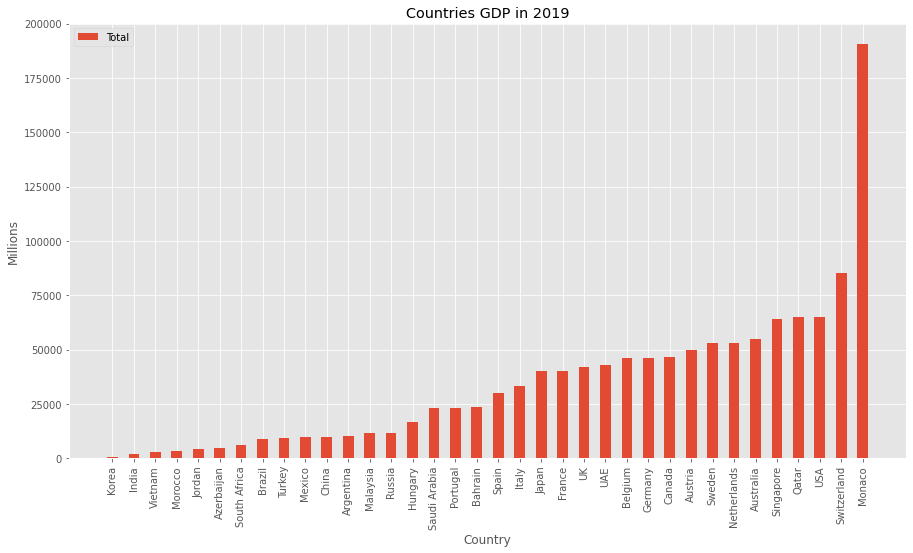

In [77]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

width=0.5

# Multiple Bar Graph
target_gdp_df_by_year = target_gdp_df[target_gdp_df['Year'] == 2019]
x_labels = target_gdp_df_by_year['Country or Area']
# first location for first bar in x-axis
plt.bar(target_gdp_df_by_year['Country or Area'], target_gdp_df_by_year['Value'], width, label="Total")

plt.title("Countries GDP in 2019")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Millions")
plt.xticks(x_labels)
plt.legend()
plt.show()
# Race 2017 , 2019 



---
We will display how many races each country did have, using dataset for races:
https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020/version/14?select=races.csv



In [78]:
races_df = pd.read_csv('/content/races.csv')
races_df.head()
print("total races: " + str(races_df.count()[0]))

total races: 1080


In [79]:
races_df_joined = races_df.merge(circuits_df[['circuitId','country']], on = 'circuitId')
country_races = races_df_joined.groupby('country').size().reset_index(name='count').sort_values('count')
for key in country_map.values():
  country_races.loc[country_races['country'] == key, 'country'] = country_by_value(key)

In [80]:
races_from_2015 = races_df_joined[races_df_joined['year'] > 2014]
country_races_2015 = races_from_2015.groupby('country').size().reset_index(name='count').sort_values('count')
for key in country_map.values():
  country_races_2015.loc[country_races_2015['country'] == key, 'country'] = country_by_value(key)

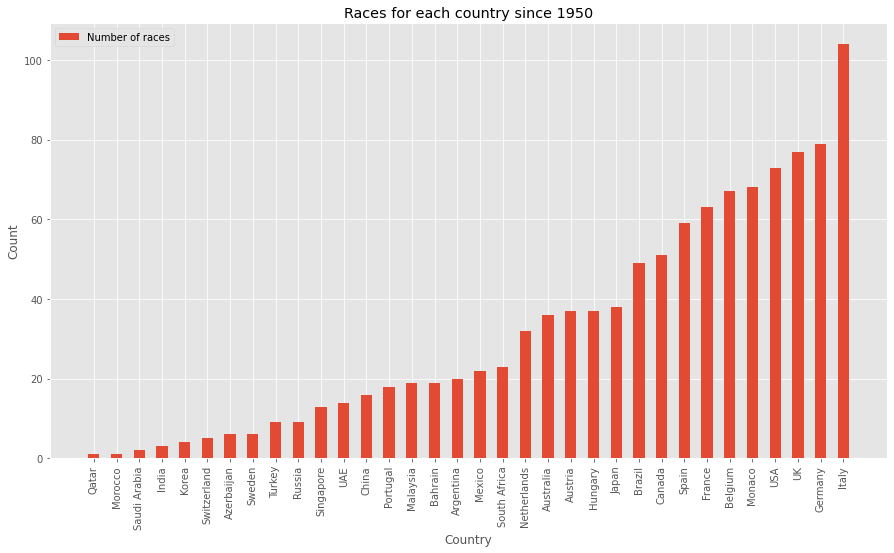

In [81]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

width=0.5

# Multiple Bar Graph
x_labels = country_races['country']
# first location for first bar in x-axis

plt.bar(country_races['country'], country_races['count'], width, label="Number of races")

plt.title("Races for each country since " + str(races_df['year'].min()))
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xticks(x_labels)
plt.legend()
plt.show()

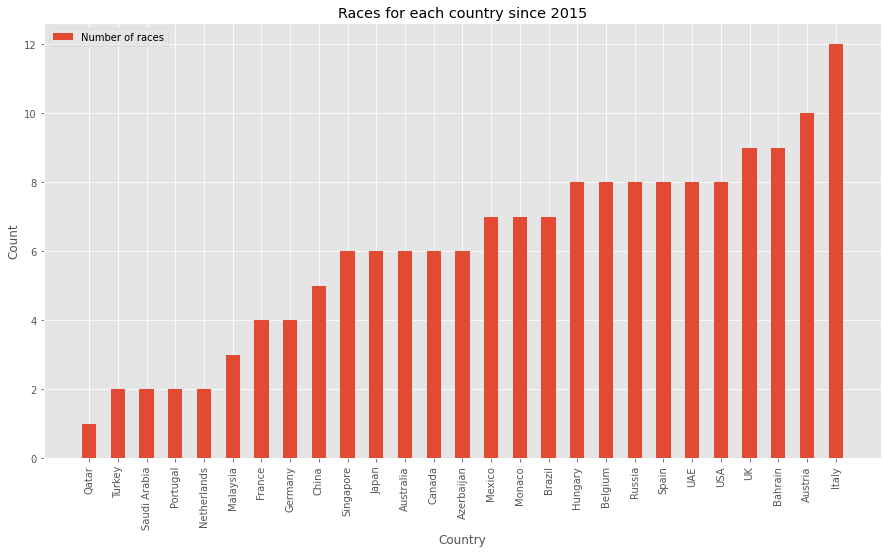

In [82]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

width=0.5

# Multiple Bar Graph
x_labels = country_races_2015['country']
# first location for first bar in x-axis

plt.bar(country_races_2015['country'], country_races_2015['count'], width, label="Number of races")

plt.title("Races for each country since 2015")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xticks(x_labels)
plt.legend()
plt.show()